# business problem 


For this Episode of the Series, your task is to use regression to predict the age of crabs given physical attributes

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sn 
import matplotlib.pyplot as pt
import warnings 
warnings.filterwarnings("ignore")
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression , Lasso , Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

train =pd.read_csv(r"C:\Users\senth\OneDrive\Desktop\data\linear regresstion data set\Regression with a Crab Age Dataset\train.csv")
test =pd.read_csv(r"C:\Users\senth\OneDrive\Desktop\data\linear regresstion data set\Regression with a Crab Age Dataset\test.csv")

In [2]:
train .head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [3]:
test.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


In [4]:
train.shape

(74051, 10)

In [5]:
test.shape

(49368, 9)

In [6]:
train=train.drop('id',axis=1)
test=test.drop('id',axis=1)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             74051 non-null  object 
 1   Length          74051 non-null  float64
 2   Diameter        74051 non-null  float64
 3   Height          74051 non-null  float64
 4   Weight          74051 non-null  float64
 5   Shucked Weight  74051 non-null  float64
 6   Viscera Weight  74051 non-null  float64
 7   Shell Weight    74051 non-null  float64
 8   Age             74051 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 5.1+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49368 entries, 0 to 49367
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             49368 non-null  object 
 1   Length          49368 non-null  float64
 2   Diameter        49368 non-null  float64
 3   Height          49368 non-null  float64
 4   Weight          49368 non-null  float64
 5   Shucked Weight  49368 non-null  float64
 6   Viscera Weight  49368 non-null  float64
 7   Shell Weight    49368 non-null  float64
dtypes: float64(7), object(1)
memory usage: 3.0+ MB


In [9]:
# rename train columns

train= train.rename(columns={'Shucked Weight':'Shucked_Weight',
                             'Viscera Weight':'Viscera_Weight',
                             'Shell Weight':'Shell_Weight'})

# rename test columns

test= test.rename(columns={'Shucked Weight':'Shucked_Weight',
                             'Viscera Weight':'Viscera_Weight',
                             'Shell Weight':'Shell_Weight'})

In [10]:
train.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked_Weight',
       'Viscera_Weight', 'Shell_Weight', 'Age'],
      dtype='object')

In [11]:
test.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked_Weight',
       'Viscera_Weight', 'Shell_Weight'],
      dtype='object')

In [12]:
# checking null values in train data 

train.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked_Weight    0
Viscera_Weight    0
Shell_Weight      0
Age               0
dtype: int64

In [13]:
#cheking null values in  test data 

test.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked_Weight    0
Viscera_Weight    0
Shell_Weight      0
dtype: int64

In [14]:
# for train data 
train_continuous=train.drop('Sex',axis=1)
train_categorial_descreate=train['Sex']

# for test data 
test_continuous=test.drop('Sex',axis=1)
test_categorial_descreate=test['Sex']


In [15]:
# statistical calculation for train data

train.describe()

,Length,Diameter,Height,Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [16]:
# statistical calculation for test data

test.describe()

,Length,Diameter,Height,Weight,Shucked_Weight,Viscera_Weight,Shell_Weight
count,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000
mean,1.319795,1.026357,0.348693,23.464627,10.130220,5.072615,6.745876
std,0.286950,0.236593,0.092259,12.641703,5.611779,2.791563,3.575650
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524
25%,1.162500,0.887500,0.300000,13.536886,5.740774,2.877474,3.968930
50%,1.387500,1.075000,0.362500,23.813580,9.979024,4.989512,6.945627
75%,1.537500,1.200000,0.412500,32.290081,14.047177,7.016501,9.171063
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248


In [17]:
# categorial  train data statistical values 

train_categorial_descreate.describe()

count     74051
unique        3
top           M
freq      27084
Name: Sex, dtype: object

In [18]:
# categorial test statisticals values
test_categorial_descreate.describe()

count     49368
unique        3
top           M
freq      17923
Name: Sex, dtype: object

In [19]:
train['Sex'].unique()

array(['I', 'M', 'F'], dtype=object)

In [20]:
train['Sex'].value_counts()

Sex
M    27084
I    23957
F    23010
Name: count, dtype: int64

In [21]:
train['Length'].nunique()

144

In [22]:
train['Diameter'].nunique()

122

In [23]:
train['Height'].nunique()

65

In [24]:
train['Weight'].nunique()

3096

In [25]:
train['Shucked_Weight'].nunique()

1766

In [26]:
train['Viscera_Weight'].nunique()

967

In [27]:
train['Shell_Weight'].nunique()

1048

In [28]:
# test data 

test['Length'].nunique()

140

In [29]:
test['Sex'].unique()

array(['I', 'F', 'M'], dtype=object)

In [30]:
test['Sex'].value_counts()

Sex
M    17923
I    15963
F    15482
Name: count, dtype: int64

In [31]:
test['Diameter'].nunique()

122

In [32]:
test['Height'].nunique()

57

In [33]:
test['Weight'].nunique()

2948

In [34]:
test['Shucked_Weight'].nunique()

1692

In [35]:
test['Shell_Weight'].nunique()


987

In [36]:
# convert the  train categorial data to count data 

train['Sex'] = train['Sex'].map({'F': 0, 'I': 1, 'M': 2})

In [37]:
# converting test categorial data to count data 

test['Sex']=test["Sex"].map({"F":0,"I":1,"M":2})

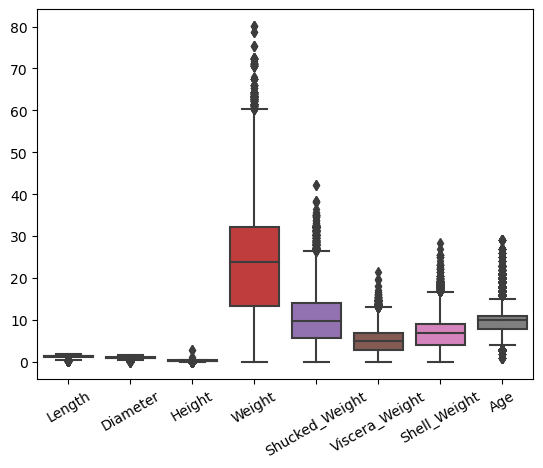

In [38]:
# train data 

sn.boxplot(train_continuous)
pt.xticks(rotation=30)
pt.show()

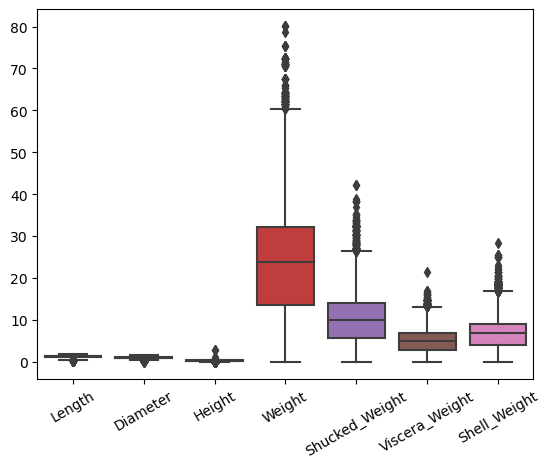

In [39]:
# test data 

sn.boxplot(test_continuous)
pt.xticks(rotation=30)
pt.show()

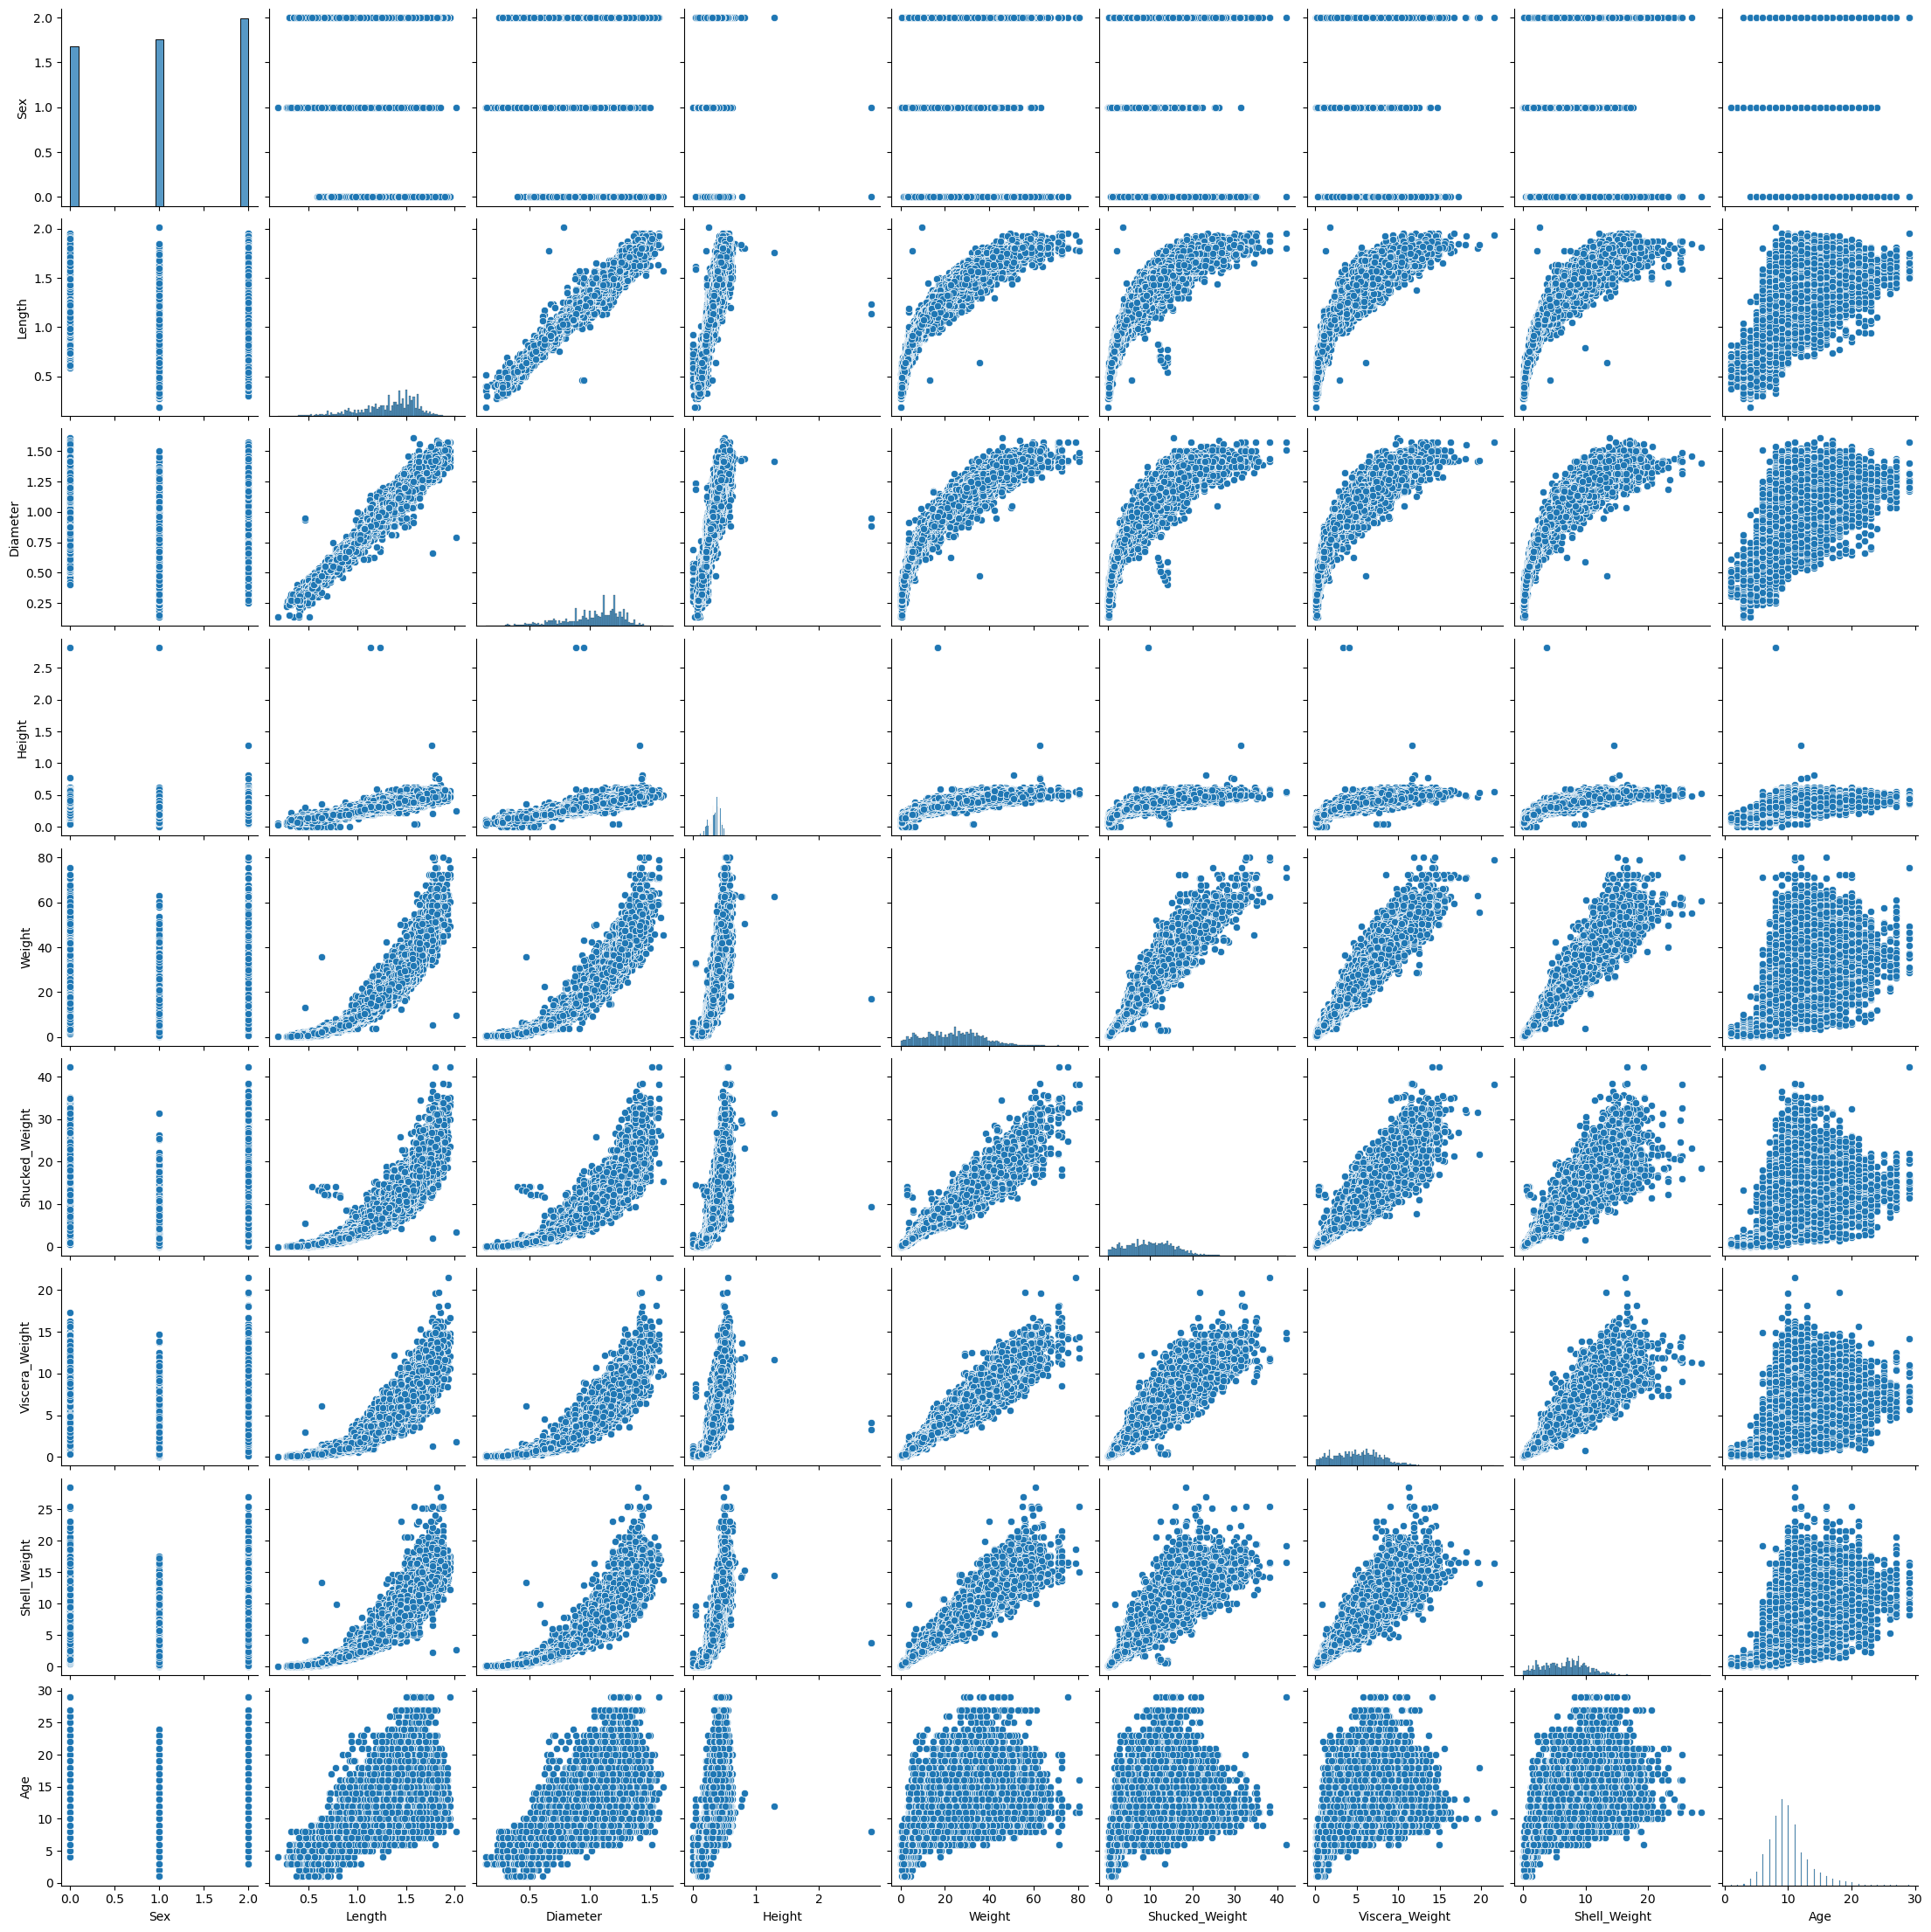

In [40]:

#  train data 

sn.pairplot(train)
pt.show()

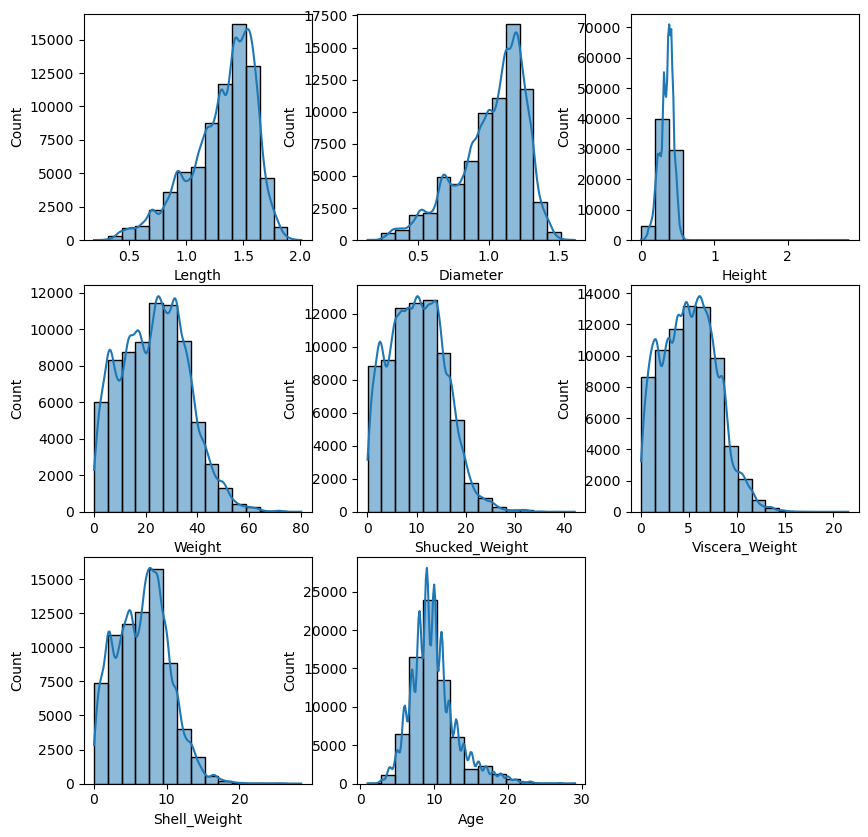

In [41]:
# histogram for train data 

pt.figure(figsize=(10,10))

pt.subplot(3,3,1)
sn.histplot(train['Length'],bins=15,kde=True)

pt.subplot(3,3,2)
sn.histplot(train['Diameter'],bins=15,kde=True)

pt.subplot(3,3,3)
sn.histplot(train['Height'],bins=15,kde=True)

pt.subplot(3,3,4)
sn.histplot(train['Weight'],bins=15,kde=True)

pt.subplot(3,3,5)
sn.histplot(train['Shucked_Weight'],bins=15,kde=True)

pt.subplot(3,3,6)
sn.histplot(train['Viscera_Weight'],bins=15,kde=True)

pt.subplot(3,3,7)
sn.histplot(train['Shell_Weight'],bins=15,kde=True)


pt.subplot(3,3,8)
sn.histplot(train['Age'],bins=15,kde=True)

pt.show()


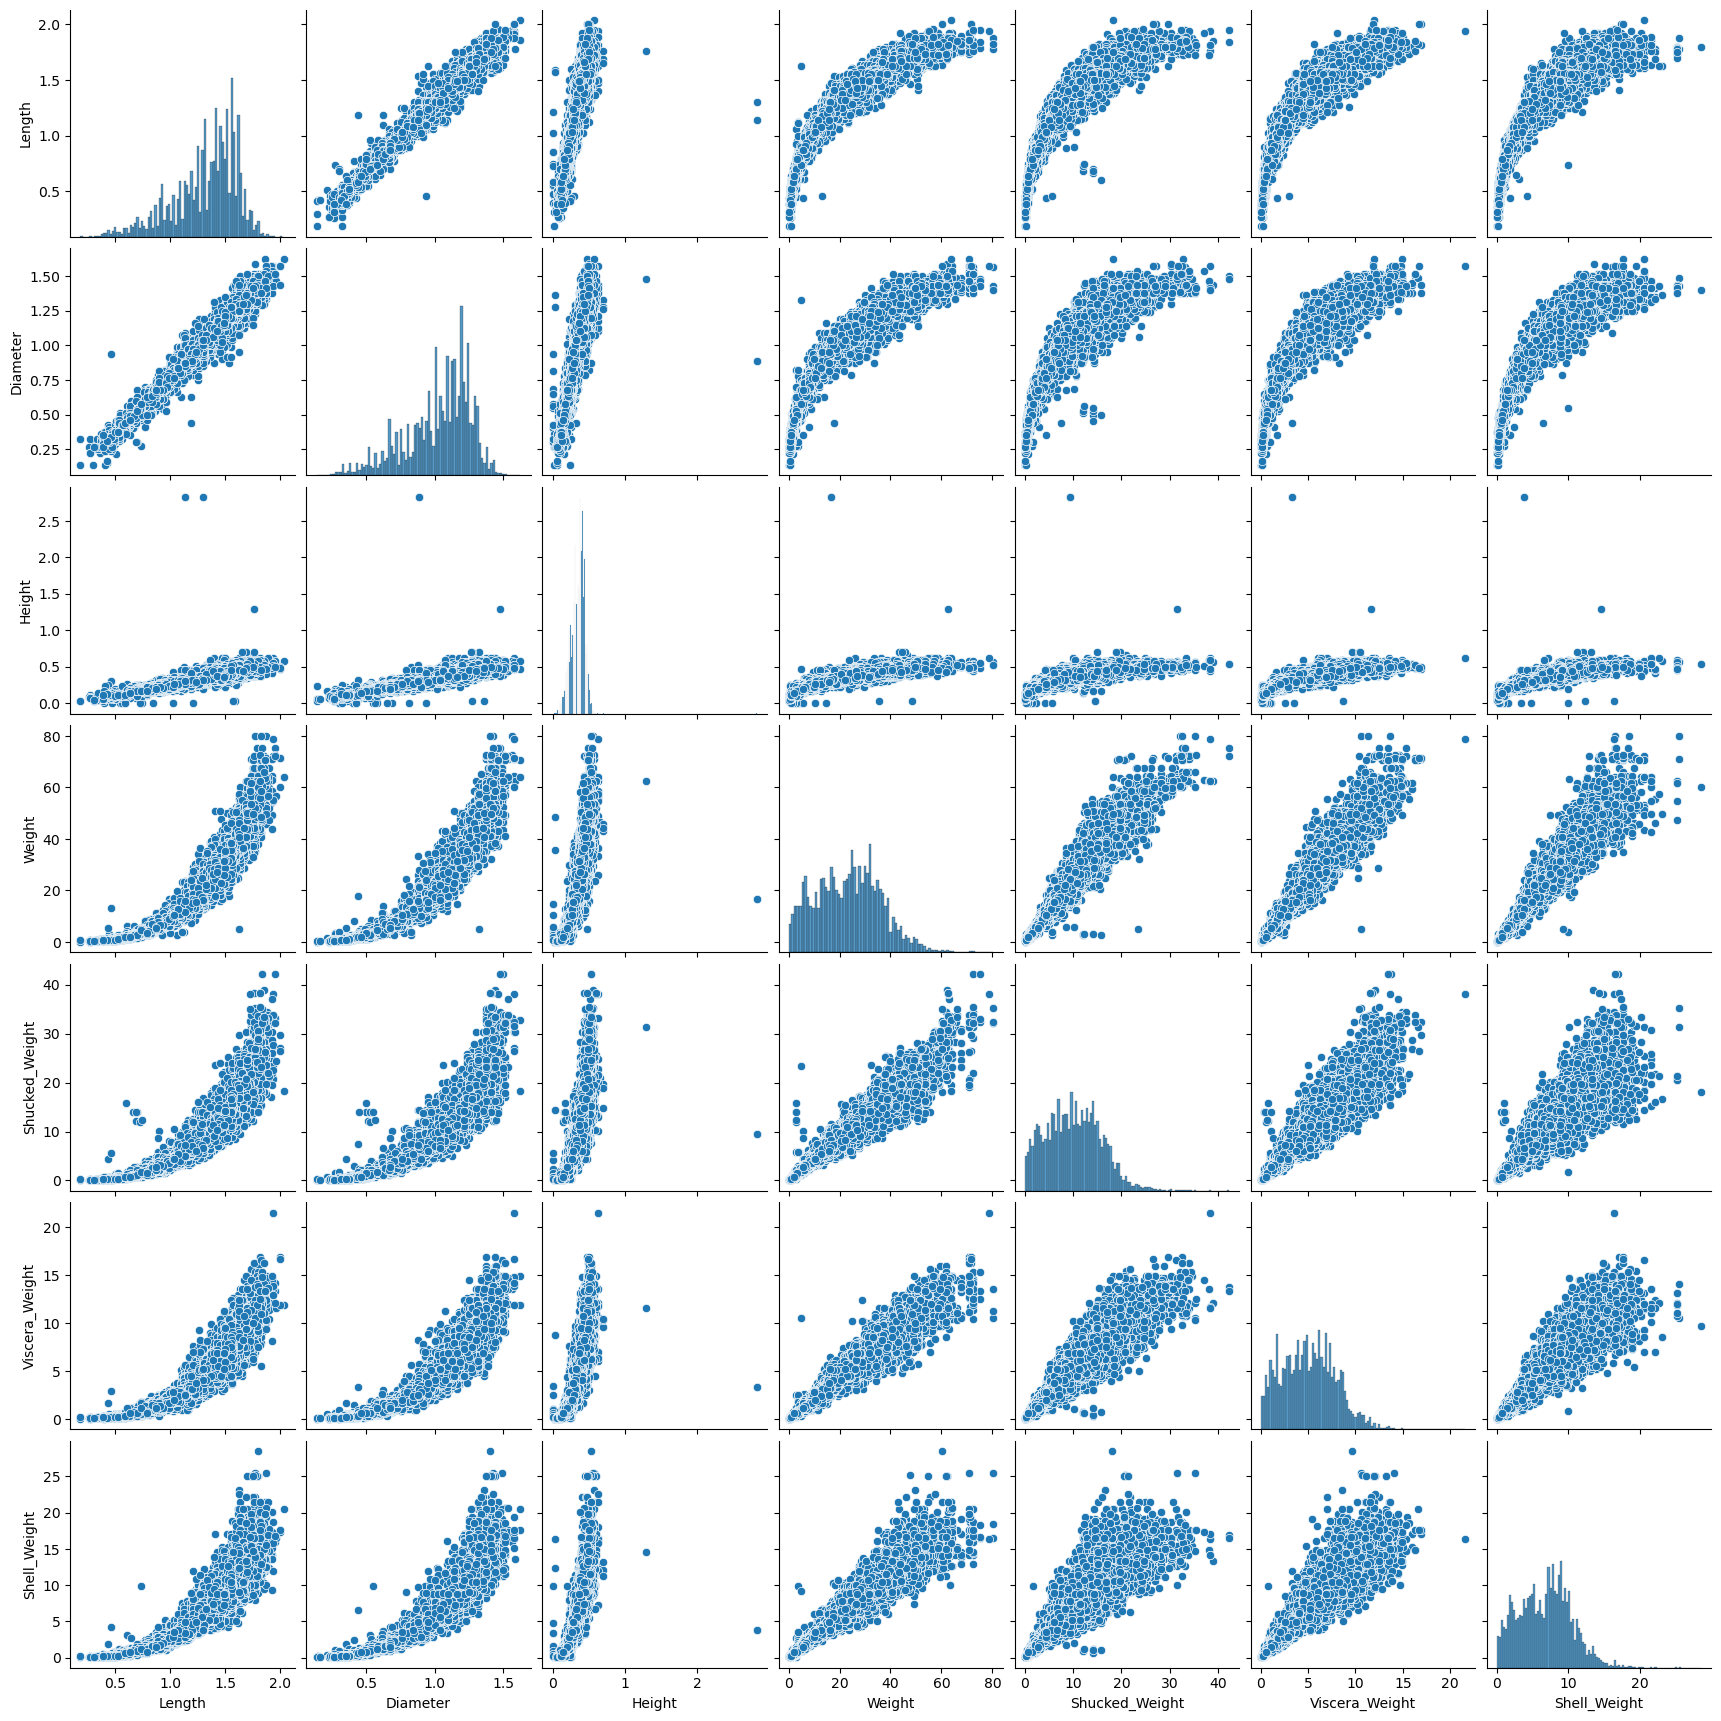

In [42]:
# test pair plot 

sn.pairplot(test_continuous)
pt.show()

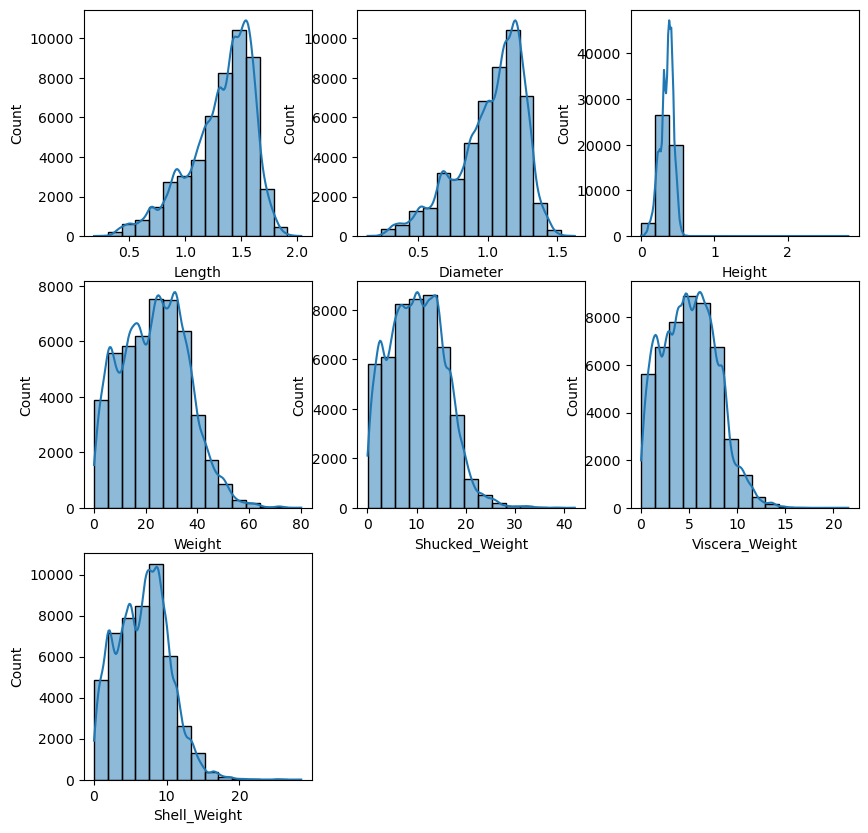

In [43]:
# histogram for test data 

pt.figure(figsize=(10,10))

pt.subplot(3,3,1)
sn.histplot(test['Length'],bins=15,kde=True)

pt.subplot(3,3,2)
sn.histplot(test['Diameter'],bins=15,kde=True)

pt.subplot(3,3,3)
sn.histplot(test['Height'],bins=15,kde=True)

pt.subplot(3,3,4)
sn.histplot(test['Weight'],bins=15,kde=True)

pt.subplot(3,3,5)
sn.histplot(test['Shucked_Weight'],bins=15,kde=True)

pt.subplot(3,3,6)
sn.histplot(test['Viscera_Weight'],bins=15,kde=True)

pt.subplot(3,3,7)
sn.histplot(test['Shell_Weight'],bins=15,kde=True)




pt.show()


In [44]:
train['Sex'].unique()

array([1, 2, 0], dtype=int64)

In [45]:
# skewness for train data 

train_continuous.skew()

Length           -0.844377
Diameter         -0.812866
Height            0.086578
Weight            0.231465
Shucked_Weight    0.349472
Viscera_Weight    0.286383
Shell_Weight      0.277459
Age               1.092919
dtype: float64

In [46]:
# skew ness for test data 
test_continuous.skew()


Length           -0.854461
Diameter         -0.821957
Height            0.343451
Weight            0.232137
Shucked_Weight    0.356356
Viscera_Weight    0.285361
Shell_Weight      0.274145
dtype: float64

<Axes: xlabel='Sex', ylabel='count'>

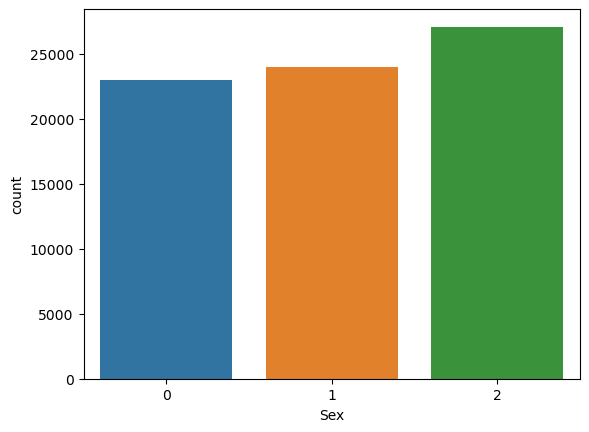

In [47]:
sn.countplot(x='Sex',data=train)

<Axes: xlabel='Sex', ylabel='count'>

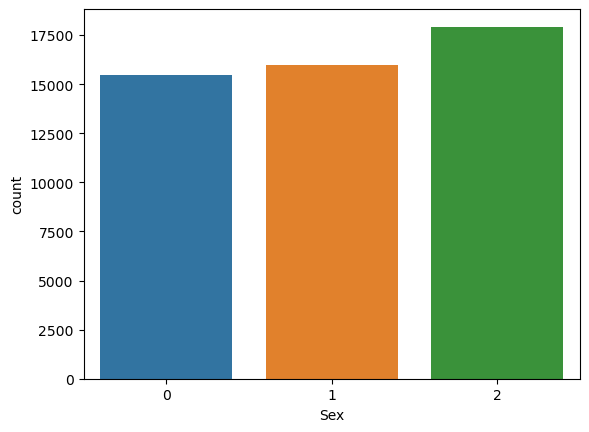

In [48]:
sn.countplot(x='Sex',data =test)


In [49]:
train.corr()

,Sex,Length,Diameter,Height,Weight,Shucked_Weight,Viscera_Weight,Shell_Weight,Age
Sex,1.000000,-0.017546,-0.018933,-0.022480,-0.024429,-0.013444,-0.027389,-0.029583,-0.033541
Length,-0.017546,1.000000,0.989437,0.918352,0.936374,0.915516,0.917855,0.916957,0.612843
Diameter,-0.018933,0.989437,1.000000,0.921353,0.938249,0.914199,0.918351,0.922688,0.621256
Height,-0.022480,0.918352,0.921353,1.000000,0.901775,0.864083,0.883127,0.903398,0.638067
Weight,-0.024429,0.936374,0.938249,0.901775,1.000000,0.971267,0.971062,0.965525,0.601195
Shucked_Weight,-0.013444,0.915516,0.914199,0.864083,0.971267,1.000000,0.942626,0.910398,0.503320
Viscera_Weight,-0.027389,0.917855,0.918351,0.883127,0.971062,0.942626,1.000000,0.933919,0.576808
Shell_Weight,-0.029583,0.916957,0.922688,0.903398,0.965525,0.910398,0.933919,1.000000,0.663473
Age,-0.033541,0.612843,0.621256,0.638067,0.601195,0.503320,0.576808,0.663473,1.000000


In [50]:
test.corr()

,Sex,Length,Diameter,Height,Weight,Shucked_Weight,Viscera_Weight,Shell_Weight
Sex,1.000000,-0.021103,-0.022124,-0.029917,-0.026096,-0.016841,-0.030797,-0.031131
Length,-0.021103,1.000000,0.989528,0.914433,0.936135,0.915109,0.917540,0.917255
Diameter,-0.022124,0.989528,1.000000,0.917109,0.938017,0.913561,0.918327,0.922974
Height,-0.029917,0.914433,0.917109,1.000000,0.895822,0.858293,0.878135,0.897574
Weight,-0.026096,0.936135,0.938017,0.895822,1.000000,0.971132,0.970527,0.964761
Shucked_Weight,-0.016841,0.915109,0.913561,0.858293,0.971132,1.000000,0.942841,0.909917
Viscera_Weight,-0.030797,0.917540,0.918327,0.878135,0.970527,0.942841,1.000000,0.933219
Shell_Weight,-0.031131,0.917255,0.922974,0.897574,0.964761,0.909917,0.933219,1.000000


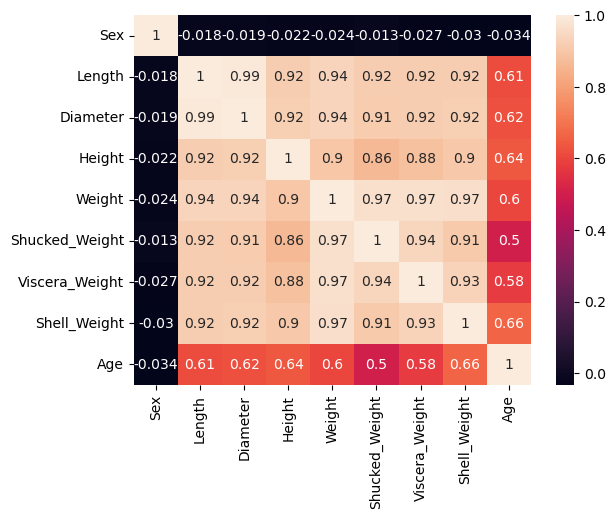

In [51]:
sn.heatmap(train.corr(),annot=True)
pt.show()

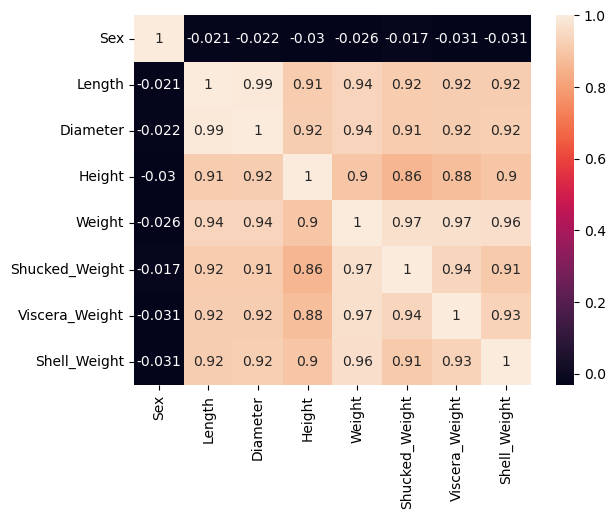

In [52]:
sn.heatmap(test.corr(),annot=True)
pt.show()

# no data cleaning 

# no data wrangning 

# model creation 

In [53]:
# linear model

X=train.drop('Age',axis=1)
y=train['Age']

model=LinearRegression()
model.fit(X, y)
print("coefficient :" ,model.coef_)
print("intercept :",model.intercept_)

ypred_train=model.predict(X)
print("train rmse :",np.sqrt(mean_squared_error(y,ypred_train)))
print("train mse :",mean_absolute_error(y,ypred_train))
print(' train r2 score :',r2_score(y,ypred_train))
print("cross_val :",cross_val_score(model,X,y,cv=5,scoring='neg_mean_absolute_error').mean())


coefficient : [-0.02199304  0.84609128  2.90842367  7.90536627  0.1984947  -0.62805468
 -0.18723562  0.52034218]
intercept : 2.2974632042496923
train rmse : 2.1552363437662527
train mse : 1.5070621282457053
 train r2 score : 0.5392594343949708
cross_val : -1.507274901157857


In [54]:
model1=smf.ols("y~X",data=train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                 1.083e+04
Date:                Fri, 19 Jul 2024   Prob (F-statistic):               0.00
Time:                        19:51:50   Log-Likelihood:            -1.6194e+05
No. Observations:               74051   AIC:                         3.239e+05
Df Residuals:                   74042   BIC:                         3.240e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2975      0.069     33.285      0.000       2.162       2.433
X[0]          -0.0220      0.010     -2.275      0.023      -0.041      -0.003
X[1]           0.8461      0.195      4.346      0.000       0.465       1.228
X[2]           2.9084      0.241     12.059      0.000       2.436       3.381
X[3]           7.9054      0.239     33.109      0.000       7.437       8.373
X[4]           0.1985      0.005     36.191      0.000       0.188       0.209
X[5]          -0.6281      0.007    -93.618      0.000      -0.641      -0.615
X[6]          -0.1872      0.012    -15.597      0.000      -0.211      -0.164
X[7]           0.5203      0.010     52.329      0.000       0.501       0.540
==============================================================================
Omnibus:                    24230.437   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           120164.622
Skew:                           1.511   Prob(JB):                         0.00
Kurtosis:                       8.460   Cond. No.                     1.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

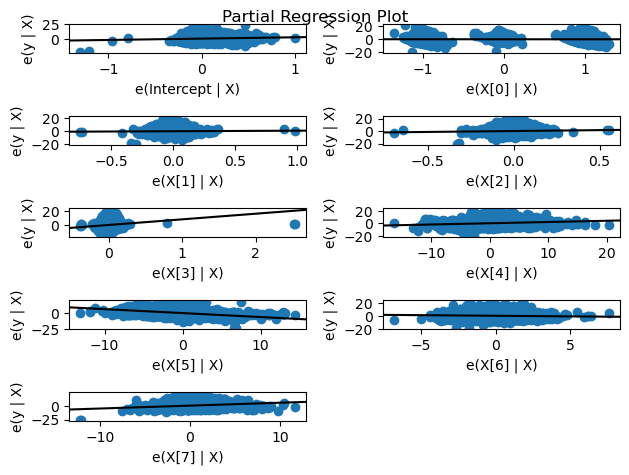

In [55]:
sm.graphics.plot_partregress_grid(model1)
pt.show()

In [56]:
test_res=y-ypred_train
test_res

0       -1.803798
1       -0.342612
2       -0.849957
3       -3.813934
4       -0.299887
           ...   
74046   -2.378440
74047   -2.639853
74048   -1.224248
74049    0.054910
74050   -1.061439
Name: Age, Length: 74051, dtype: float64

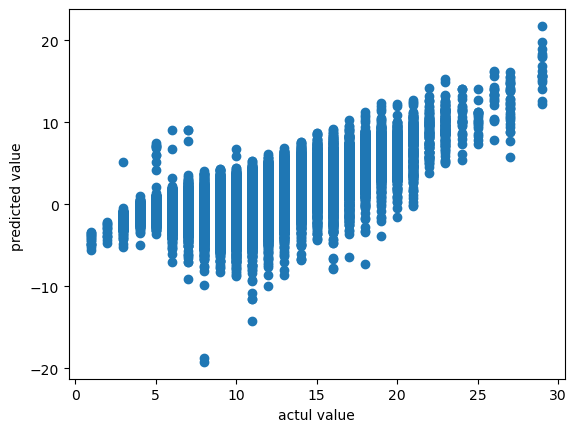

In [57]:
pt.scatter(y,test_res)
pt.xlabel("actul value")
pt.ylabel("predicted value ")
pt.show()

1.5115102477207583


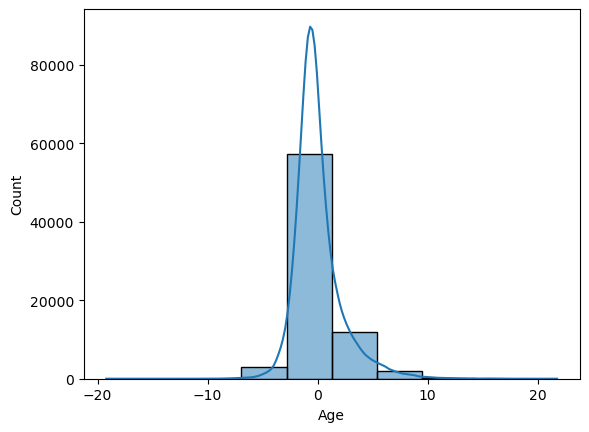

In [58]:
print(test_res.skew())
sn.histplot(test_res ,bins= 10 , kde=True)
pt.show()

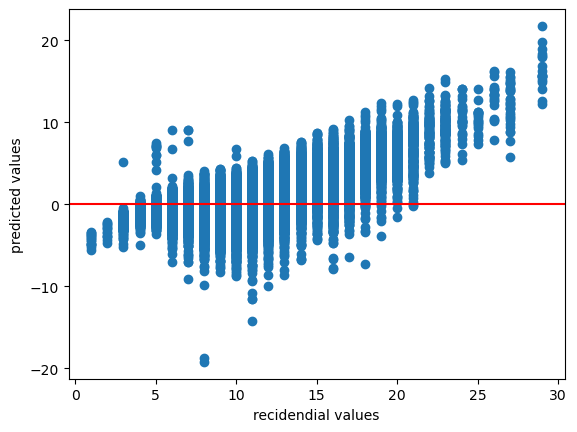

In [59]:
pt.scatter(y,test_res)
pt.axhline(y=0,color='r')
pt.xlabel("recidendial values")
pt.ylabel("predicted values")
pt.show()

# model selection 

In [60]:
# polynomial regression 

poly_model=PolynomialFeatures(degree=4)
poly_model_x=pd.DataFrame(poly_model.fit_transform(X))

model.fit(poly_model_x,y)
print("coefficeient :",model.coef_)
print("intercept :",model.intercept_)

poly_ypred=model.predict(poly_model_x)
print("poly rmse :",np.sqrt(mean_squared_error(y,poly_ypred)))
print('poly mse :',mean_absolute_error(y,poly_ypred))
print("poly r2 score :",r2_score(y,poly_ypred))
print("cross val :",cross_val_score(model,poly_model_x,y,cv=5,scoring="neg_mean_absolute_error").mean())


coefficeient : [-3.82926878e-04  8.99085645e+00  2.06876667e+01  1.64170650e+01
  2.93887324e+01 -1.68416532e+00  7.92057332e+00 -3.59346117e+00
 -2.49416212e+00  7.17229277e+00 -2.32698109e+01 -2.54407065e+01
 -1.03238012e-01  9.49857570e-01 -2.50185453e-01  3.07111566e+00
 -1.48882230e+00 -6.31778285e+01  1.98864025e+02 -1.74960501e+02
  6.21290293e+00  1.39313854e+01 -1.55959881e+01 -4.18662448e+01
 -1.39175069e+02  4.79851251e+01 -5.61005831e+00 -3.79877750e+01
  2.31490604e+01  6.99301069e+01 -1.41336231e+02  2.19691816e+01
 -5.54149080e+01  4.12727833e+01 -7.39710018e+00  5.39657715e-01
 -4.20817698e-01 -2.38640621e+00 -1.96940948e+00 -1.39594116e-01
  2.93631734e+00  1.77918408e+00  2.90525828e-01  2.20908449e+00
  9.17937428e-01  3.53487289e+00 -1.20683615e+01 -1.46474499e+01
 -8.43227424e-02  5.32304321e-01 -2.01932560e-01  1.78640929e+00
 -8.32816924e-01  3.57967736e+01 -2.22501180e+00 -9.59257585e+01
 -2.61608691e+00  3.34356536e+00 -9.62629201e+00  8.28284490e+00
  2.087893

# lasso model

In [61]:
# lasso model
estimator =Lasso()
params_grid={'alpha':list(range(1,100))}

model_hp=GridSearchCV(estimator,params_grid,cv=5,scoring="neg_mean_absolute_error")
model_hp.fit(X,y)
model_hp.best_params_

{'alpha': 1}

In [62]:
lasso_model=Lasso(alpha=1)
lasso_model.fit(X,y)
print("coefficient :",lasso_model.coef_)
print("intercept :",lasso_model.intercept_)

lasso_ypred=lasso_model.predict(X)
print("lasso rmse :",np.sqrt(mean_squared_error(y,lasso_ypred)))
print('lasso mse :',mean_absolute_error(y,lasso_ypred))
print("lasso r2 score :",r2_score(y,lasso_ypred))
print("cross val :",cross_val_score(lasso_model,X,y,cv=5,scoring="neg_mean_absolute_error").mean())


coefficient : [-0.          0.          0.          0.          0.0761653  -0.
  0.          0.25039867]
intercept : 6.503015686595938
lasso rmse : 2.4546985576516573
lasso mse : 1.7500090238905381
lasso r2 score : 0.40232790124324214
cross val : -1.750073795230831


# ridge model

In [63]:
# lasso model
estimator =Ridge()
params_grid={'alpha':list(range(1,100))}

model_hp=GridSearchCV(estimator,params_grid,cv=5,scoring="neg_mean_absolute_error")
model_hp.fit(X,y)
model_hp.best_params_

{'alpha': 1}

In [64]:
ridge_model=Ridge(alpha=1)
ridge_model.fit(X,y)
print("coefficient :",ridge_model.coef_)
print("intercept :",ridge_model.intercept_)

ridge_ypred=ridge_model.predict(X)
print("ridge rmse :",np.sqrt(mean_squared_error(y,ridge_ypred)))
print('ridge mse :',mean_absolute_error(y,ridge_ypred))
print("ridge r2 score :",r2_score(y,ridge_ypred))
print("cross val :",cross_val_score(ridge_model,X,y,cv=5,scoring="neg_mean_absolute_error").mean())


coefficient : [-0.02199309  0.87266863  2.89284214  7.8151476   0.19856658 -0.62819511
 -0.18701378  0.52122416]
intercept : 2.302501770442051
ridge rmse : 2.155238619595209
ridge mse : 1.5070605818440035
ridge r2 score : 0.5392584613534042
cross val : -1.5072744881941933


# Elastic net

In [65]:
estimator=ElasticNet()
params={'alpha':[1,2,3,5,6,7,8,9,10],'l1_ratio':[0.1,0.5,0.75,0.9,0.95,1]}
model_h1=GridSearchCV(estimator,params,cv=5,scoring='r2')
model_h1.fit(X,y)
model_h1.best_params_

{'alpha': 1, 'l1_ratio': 0.1}

In [66]:
elastic_model=ElasticNet(alpha=1,l1_ratio=0.1)
elastic_model.fit(X,y)
print("coefficient :",elastic_model.coef_)
print("intercept :",elastic_model.intercept_)

elastic_ypred=elastic_model.predict(X)
print("ealstic rmse :",np.sqrt(mean_squared_error(y,elastic_ypred)))
print('elastic mse :',mean_absolute_error(y,elastic_ypred))
print("elastic r2 score :",r2_score(y,elastic_ypred))
print("cross val :",cross_val_score(elastic_model,X,y,cv=5,scoring="neg_mean_absolute_error").mean())


coefficient : [-0.          0.          0.          0.          0.19796313 -0.36992867
  0.          0.40497268]
intercept : 6.353270653736537
ealstic rmse : 2.272018295964651
elastic mse : 1.5990694208419172
elastic r2 score : 0.48797602619572766
cross val : -1.5991174514534785


# final model

In [79]:


final_model_poly=PolynomialFeatures(degree=4)
final_model_x=pd.DataFrame(final_model_poly.fit_transform(X))
final_model=LinearRegression()

final_model.fit(poly_model_x,y)
print("coefficeient :",final_model.coef_)
print("intercept :",final_model.intercept_)

final_ypred=final_model.predict(final_model_x)
print("final poly rmse :",np.sqrt(mean_squared_error(y,final_ypred)))
print('final poly mse :',mean_absolute_error(y,final_ypred))
print("final poly r2 score :",r2_score(y,final_ypred))
print("final cross val :",cross_val_score(final_model,final_model_x,y,cv=5,scoring="neg_mean_absolute_error").mean())

final_model_test=pd.DataFrame(final_model_poly.transform(test))





coefficeient : [-3.82926878e-04  8.99085645e+00  2.06876667e+01  1.64170650e+01
  2.93887324e+01 -1.68416532e+00  7.92057332e+00 -3.59346117e+00
 -2.49416212e+00  7.17229277e+00 -2.32698109e+01 -2.54407065e+01
 -1.03238012e-01  9.49857570e-01 -2.50185453e-01  3.07111566e+00
 -1.48882230e+00 -6.31778285e+01  1.98864025e+02 -1.74960501e+02
  6.21290293e+00  1.39313854e+01 -1.55959881e+01 -4.18662448e+01
 -1.39175069e+02  4.79851251e+01 -5.61005831e+00 -3.79877750e+01
  2.31490604e+01  6.99301069e+01 -1.41336231e+02  2.19691816e+01
 -5.54149080e+01  4.12727833e+01 -7.39710018e+00  5.39657715e-01
 -4.20817698e-01 -2.38640621e+00 -1.96940948e+00 -1.39594116e-01
  2.93631734e+00  1.77918408e+00  2.90525828e-01  2.20908449e+00
  9.17937428e-01  3.53487289e+00 -1.20683615e+01 -1.46474499e+01
 -8.43227424e-02  5.32304321e-01 -2.01932560e-01  1.78640929e+00
 -8.32816924e-01  3.57967736e+01 -2.22501180e+00 -9.59257585e+01
 -2.61608691e+00  3.34356536e+00 -9.62629201e+00  8.28284490e+00
  2.087893

In [80]:
final_ypred_test=final_model.predict(final_model_test)